In [1]:
using PyPlot;

In [59]:
coinFlip(w)= (rand()< w)? 1: 0;
function CoinAssignment2(w,num,falg)
    H= [0:0.001:1];
    
    events= zeros(Int,1,num);
    for i=1:num
        events[i]= coinFlip(w);
    end
        
    perior_prob= zeros(3,length(H));
    posterior_prob= zeros(3,length(H));
    norm= zeros(3,2);
    posterior_probNorm= zeros(3,length(H));
    
    #--------------------------------------
    b=1; a=0; #parameters for Uniform distribution
    
    segma= 0.5; meue= 0.5;#parameters for Normal distribution
    
    alfa= 0.5; beta=0.5;#parameters for Beta distribution
    
    N= num; R= sum(events);#parameters for Binomial distribution
    #--------------------------------------------------
    if num > 0
        likelihood= H.^R .* (1-H).^(N-R); #likelihood function follows Binomial Distribution
    else
        likelihood= 1;  #in at first step no data
    end
        
    perior_prob[1,:]= (1/(b-a))*ones(Int,1,length(H)); #perior function follows Uniform distribution
    for i=1:length(H)
        perior_prob[2,i]= (exp(-(H[i]-meue)^2 / (2*segma^2))/(segma*(2* pi)^(1/2)));
        perior_prob[3,i]= (H[i])^(alfa-1)*(1-H[i])^(beta-1);
    end
    #--------------------------------------------------
    posterior_prob= likelihood' .* perior_prob;
    
    posterior_probNorm= posterior_prob;
    
    if (falg == 1)
        norm= [minimum(posterior_prob,2) maximum(posterior_prob,2)];
        println("Hellow in normalization")
    
        if (norm[3,2] == Inf)
            k= find(posterior_prob[3,:] .== Inf);
            posterior_prob[3,k] = 1;
            norm[3,2]= 1;
            sec_max= maximum(posterior_prob[3,:])
            posterior_prob[3,k] = sec_max + 1;
            norm[3,2]= sec_max+ 1;
        end

        for j=2:3
            posterior_probNorm[j,:] = (posterior_prob[j,:] - norm[j,1])./(norm[j,2] - norm[j,1]);
        end 
    end

    
    #posterior_prob= perior_prob; #just for test in the first case (no data)
    
    plot(H,posterior_probNorm');
    
    infor= gca();
    
    #plot(H,posterior_prob');
    ylabel("Posterior Prob")
    xlabel("H wight")
    infor[:set_yticks]([0,1.01]) 
    infor[:legend](("Uniform Dis.", "Normal Dis.", "Beta Dis."), prop=["size" => "small"], loc=1)
    #return H, posterior_probNorm;
end

CoinAssignment2 (generic function with 2 methods)

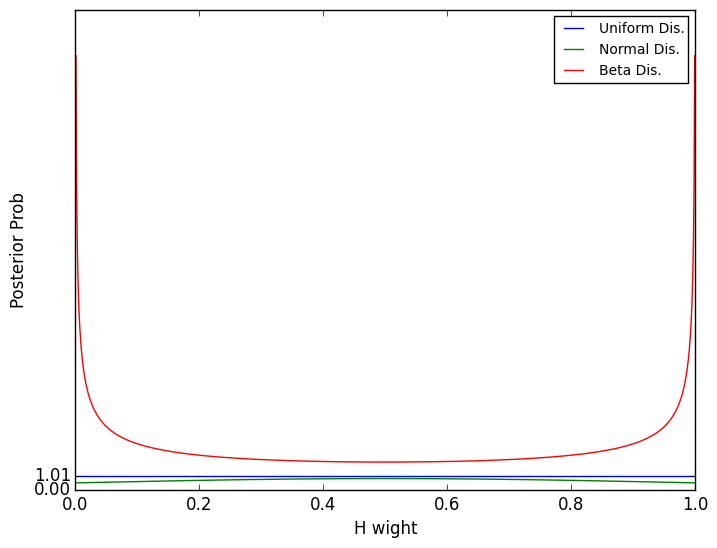

PyObject <matplotlib.legend.Legend object at 0x000000002E547E48>

In [60]:
CoinAssignment2(0.25,0,0) # not using normalization


 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at abstractarray.jl:29
 in CoinAssignment2 at In[59]:3
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at C:\Users\Magy\.julia\v0.4\IJulia\src\execute_request.jl:177
 in eventloop at C:\Users\Magy\.julia\v0.4\IJulia\src\IJulia.jl:141
 in anonymous at task.jl:447
while loading In[60], in expression starting on line 1

Hellow in normalization

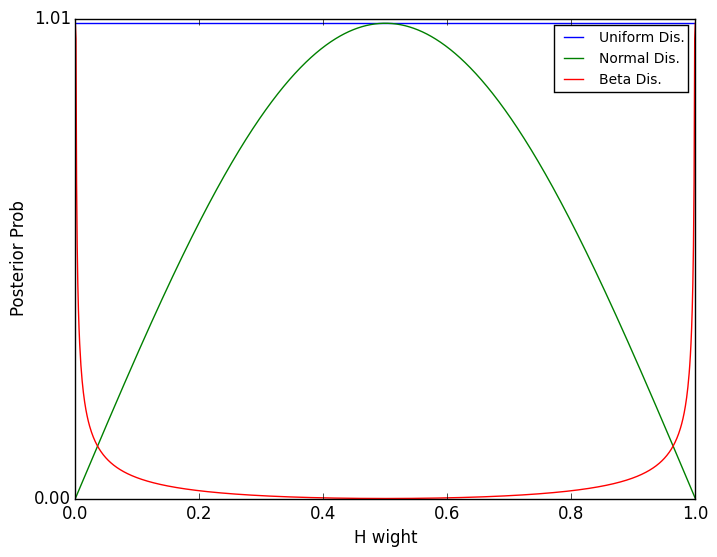

PyObject <matplotlib.legend.Legend object at 0x00000000312850B8>


 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at abstractarray.jl:29
 in CoinAssignment2 at In[59]:3
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at C:\Users\Magy\.julia\v0.4\IJulia\src\execute_request.jl:177
 in eventloop at C:\Users\Magy\.julia\v0.4\IJulia\src\IJulia.jl:141
 in anonymous at task.jl:447
while loading In[61], in expression starting on line 1


In [61]:
CoinAssignment2(0.25,0,1) #using normalization

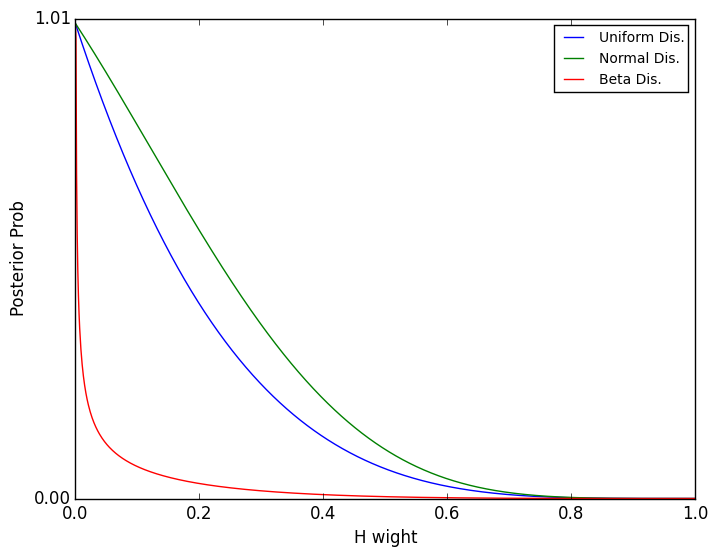

PyObject <matplotlib.legend.Legend object at 0x00000000312ED668>

Hellow in normalization


In [62]:
CoinAssignment2(0.25,4,1)


 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at abstractarray.jl:29
 in CoinAssignment2 at In[59]:3
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at C:\Users\Magy\.julia\v0.4\IJulia\src\execute_request.jl:177
 in eventloop at C:\Users\Magy\.julia\v0.4\IJulia\src\IJulia.jl:141
 in anonymous at task.jl:447
while loading In[62], in expression starting on line 1

Hellow in normalization

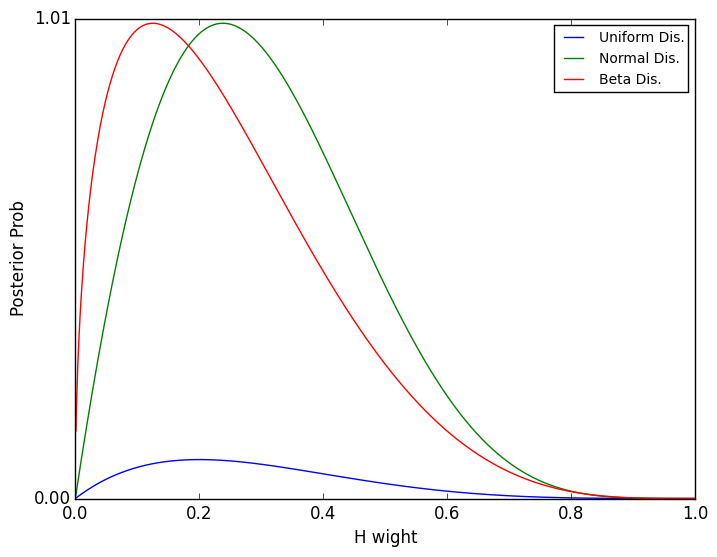

PyObject <matplotlib.legend.Legend object at 0x0000000031356A58>


 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at abstractarray.jl:29
 in CoinAssignment2 at In[59]:3
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at C:\Users\Magy\.julia\v0.4\IJulia\src\execute_request.jl:177
 in eventloop at C:\Users\Magy\.julia\v0.4\IJulia\src\IJulia.jl:141
 in anonymous at task.jl:447
while loading In[63], in expression starting on line 1


In [63]:
CoinAssignment2(0.25,5,1)

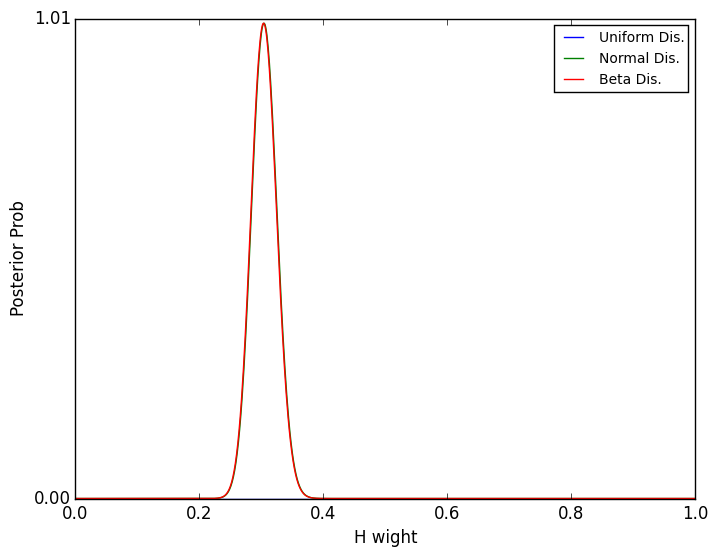

PyObject <matplotlib.legend.Legend object at 0x00000000316DEE48>

Hellow in normalization



 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at abstractarray.jl:29
 in CoinAssignment2 at In[59]:3
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at C:\Users\Magy\.julia\v0.4\IJulia\src\execute_request.jl:177
 in eventloop at C:\Users\Magy\.julia\v0.4\IJulia\src\IJulia.jl:141
 in anonymous at task.jl:447
while loading In[64], in expression starting on line 1


In [64]:
CoinAssignment2(0.25,500,1)